### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Генералов Даниил
##### Группа:   НПИбд-01-21

## Москва 2024
***

### Вариант №22

Текст задания:

1. Набор данных: howell 

2. Независимая переменная: height 

3. Зависимая переменная: weight 

4. Визуализация для независимой переменной – столбчатая диаграмма 

5. Визуализация для зависимой переменной – эмпирическая плотность распределения 

6. Показатель качества регрессии – R^2 (коэффициент детерминации) 



In [1]:
# 1: загружаем данные
try:
    import tensorflow as tf
    import tensorflow_datasets as tfds
    import matplotlib.pyplot as plt
    import pandas
    import numpy as np
except ImportError:
    !pip3 install tensorflow
    !pip3 install tfds-nightly
    !pip3 install matplotlib
    !pip3 install pandas
    !pip3 install numpy
    import tensorflow as tf
    import tensorflow_datasets as tfds
    import matplotlib.pyplot as plt
    import pandas
    import numpy as np

2024-04-18 02:37:53.879541: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 02:37:54.905979: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from IPython import display as D
disp = D.display
MD = D.Markdown

In [3]:
data = tfds.load('howell', split='train')
df = tfds.as_dataframe(data)
df.head()

2024-04-18 02:37:56.746094: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-18 02:37:57.040801: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


,age,height,male,weight
0,20.0,154.899994,1,38.200001
1,21.0,155.574997,0,45.529297
2,21.0,146.050003,0,44.763859
3,21.0,163.830002,1,46.776676
4,18.0,149.225006,0,42.127357


In [4]:
df.info()

<class 'tensorflow_datasets.core.as_dataframe.as_dataframe.<locals>.StyledDataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     544 non-null    float32
 1   height  544 non-null    float32
 2   male    544 non-null    int32  
 3   weight  544 non-null    float32
dtypes: float32(3), int32(1)
memory usage: 8.6 KB


In [5]:
df = df.drop(columns=['male'])
df.head()

,age,height,weight
0,20.0,154.899994,38.200001
1,21.0,155.574997,45.529297
2,21.0,146.050003,44.763859
3,21.0,163.830002,46.776676
4,18.0,149.225006,42.127357


In [6]:
import random
random.seed('Генералов Даниил')
test_ratio = 0.2

train = pandas.DataFrame(columns=df.columns)
test = pandas.DataFrame(columns=df.columns)
for row_idx in range(len(df)):
    row = df.loc[row_idx, :]
    if random.random() < test_ratio:
        test.loc[len(test), :] = row
    else:
        train.loc[len(train), :] = row

len(train), len(test)

(416, 128)

In [7]:
# анализ данных
disp(MD("## Матрица корреляции:"))
cor = train.corr()
disp(cor)

disp(MD("## Минимальная корреляция:"))
cor_st = cor.stack()
idx = cor_st.idxmin()
print(idx, '->', cor_st[idx])
disp(MD("## Максимальная корреляция:"))
idx = cor_st[cor_st!=1.0].idxmax()
print(idx, '->', cor_st[idx])

## Матрица корреляции:

,age,height,weight
age,1.000000,0.697215,0.690052
height,0.697215,1.000000,0.941922
weight,0.690052,0.941922,1.000000


## Минимальная корреляция:

('age', 'weight') -> 0.6900518884319605


## Максимальная корреляция:

('height', 'weight') -> 0.9419218557199522


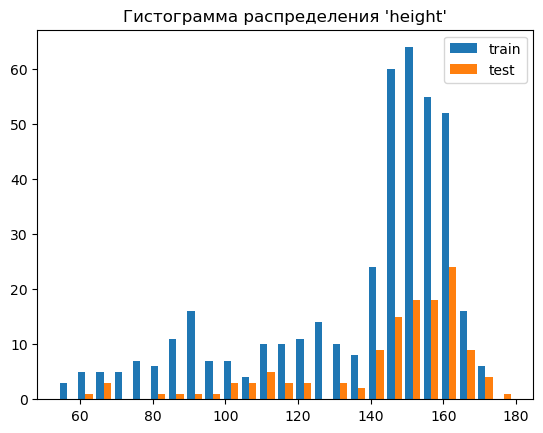

In [8]:
# 2: визуализация
fig, ax = plt.subplots()
ax.hist((train['height'], test['height']), label=['train', 'test'], bins=25)
ax.legend()
ax.set_title("Гистограмма распределения 'height'")
plt.show()

<Axes: title={'center': 'Диаграмма рассеивания'}, xlabel='height', ylabel='weight'>

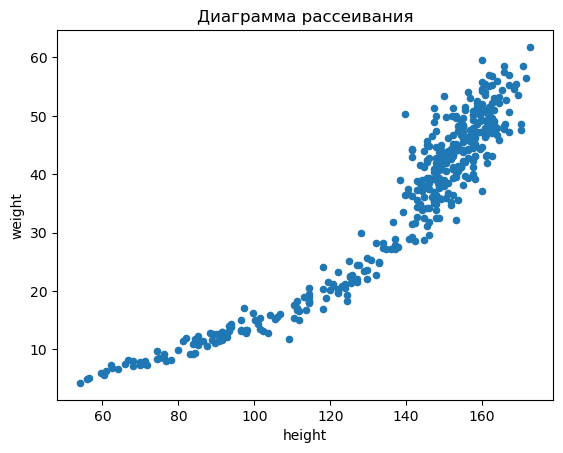

In [9]:
# 3: диаграма рассеивания 
train.plot.scatter('height', 'weight', title='Диаграмма рассеивания')

In [10]:
# 4: линейная регрессия
## явной схемой
x = train["height"]
y = train["weight"]
x_test = test["height"]
y_test = test["weight"]

x_mean = np.mean(x)
y_mean = np.mean(y)

xbar = x - x_mean
ybar = y - y_mean
k = xbar.dot(ybar) / xbar.dot(xbar)
m = y_mean - k*x_mean
k, m

(0.4931890744808294, -32.618772403482915)

In [11]:
y_hat_explicit_train = np.array(k * x + m)
y_hat_explicit_test = np.array(k * x_test + m)

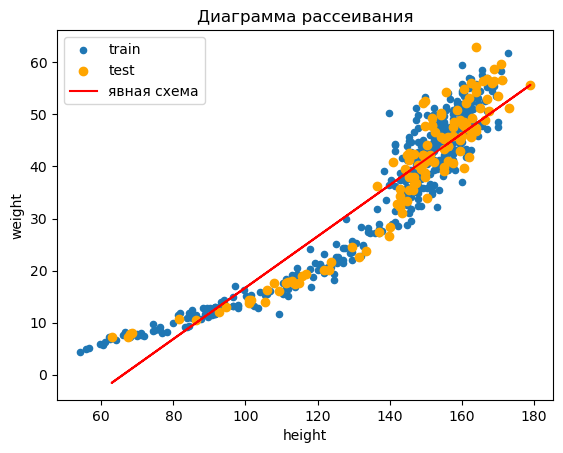

In [12]:
ax = train.plot.scatter('height', 'weight', title='Диаграмма рассеивания', label='train')
ax.scatter(test['height'], test['weight'], color='orange', label='test')
ax.plot(x_test, y_hat_explicit_test, color='r', label='явная схема')
ax.legend()

In [13]:
mean_sq_error = sum([(lin - actual)**2 for lin, actual in zip(y_hat_explicit_test, y_test)]) / len(y_test)
mean_sq_error

25.441917756669504

In [14]:
# https://stackoverflow.com/a/61548813/5936187
def r_squared(y, y_hat):
    y_bar = y.mean()
    ss_tot = ((y-y_bar)**2).sum()
    ss_res = ((y-y_hat)**2).sum()
    return 1 - (ss_res/ss_tot)

In [15]:
r2 = r_squared(y_test, y_hat_explicit_test)
r2

0.8697705142315317

In [16]:
## нейроном
model = tf.keras.Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(1),
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=["r2_score"]
)

In [18]:
x = np.asarray(train["height"]).astype(np.float32)
y = np.asarray(train["weight"]).astype(np.float32)
x_test = np.asarray(test["height"]).astype(np.float32)
y_test = np.asarray(test["weight"]).astype(np.float32)

model.fit(x, y, epochs=1000, verbose=0)

In [19]:
model_predict = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


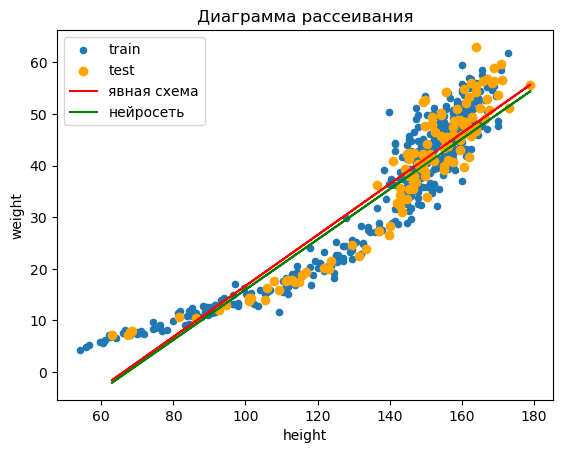

In [20]:
ax = train.plot.scatter('height', 'weight', title='Диаграмма рассеивания', label='train')
ax.scatter(test['height'], test['weight'], color='orange', label='test')
ax.plot(x_test, y_hat_explicit_test, color='r', label='явная схема')
ax.plot(x_test, model_predict, color="g", label="нейросеть")
ax.legend()

In [21]:
loss, r2_model = model.evaluate(x_test, y_test)
disp(MD(f"## R^2 явной схемы: {r2}"))
disp(MD(f"## R^2 нейросети: {r2_model} (- {r2 - r2_model})"))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2207 - r2_score: 0.8440  


## R^2 явной схемы: 0.8697705142315317

## R^2 нейросети: 0.8605665564537048 (- 0.009203957777826899)

In [22]:
mean_sq_error_neural = sum([(lin - actual)**2 for lin, actual in zip(model_predict, y_test)]) / len(y_test)
mean_sq_error, mean_sq_error_neural

(25.441917756669504, array([27.240023], dtype=float32))